# Lista 3
### NCG-040 - Introdução à Visão Computacional

**Instruções:**

 1. Comentários nos códigos desenvolvidos.
 1. Caso exista uma pergunta, deve ser respondida como comentários no arquivo ou em uma nova célula de texto.
 1. Digitar seu nome e DRE abaixo.
 1. Ao finalizarem a lista, renomeie ou salve uma cópia do arquivo no formato NomeSobrenome_ListaX.ipynb
 1. Enviar via Dropbox até 24/08/2021 - https://www.dropbox.com/request/BHSy3XhiLxmLF1tq45a7

`Nome: `Pedro Henrique Gomes Peixoto Januario

`DRE: ` 119042303

### 0) Setup

Para esta lista, vamos usar o Numpy, PyPlot, OpenCV e Random. Use a célula abaixo para importar as bibliotecas.

In [ ]:
import cv2, random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
a = np.array([[3,0],[3,2],[4,0]])
a.T

array([[3, 3, 4],
       [0, 2, 0]])

A célula abaixo baixa as imagens que iremos utilizar nessa lista, são elas:


* Lena - lena.png   
* Tabuleiro de Xadrez - xadrez.png
* Grid de círculos - circlesgrid.jpg



In [ ]:
!wget -O lena.png https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
!wget -O xadrez.jpg https://st2.depositphotos.com/4708565/7132/v/380/depositphotos_71321153-stock-illustration-illustration-with-chess-board-background.jpg
!wget -O circlesgrid.jpg https://i.stack.imgur.com/qNsTz.jpg
!wget -O moedas.png https://i.stack.imgur.com/PzB9I.png
!wget -O oleo.jpg https://pt.org.br/wp-content/uploads/2019/10/manchas-oleo-nordeste-780x440.jpg

### 1) Detecção de bordas

As operações de detecção de bordas são bastante úteis na segmentação de imagens, pois facilita a identificação de objetos através de visão computacional.

Existem diversas formas de detectar bordas, a mais conhecida é o método de Canny Edge Detection

a) Na célula abaixo, carregue a imagem lenna.png dentro de um novo array com a função imread do OpenCV

b) Em seguida, crie uma nova célula, crie uma cópia da imagem aplicando Canny Edge Detection e plote o resultado em escala de cinza.

c) Por fim, em uma nova célula, aplique os tipos de thresholding que vimos em sala, criando uma cópia para cada, em cima da imagem em que foi aplicada a técnica Canny.

d) Plote e Comente os resultados. Qual versão teve as bordas mais visíveis? Qual você acha que é mais fácil para a detectar, em termos computacionais? Discutiremos isso em sala.

Dica: Utilize subplot do PyPlot para plotar os resultados usando apenas uma célula.

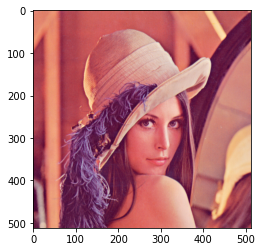

In [ ]:
lena = cv2.imread("lena.png")
plt.imshow(cv2.cvtColor(lena,cv2.COLOR_BGR2RGB))

#### Letra B

83 154


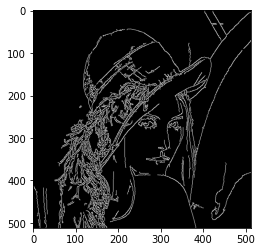

In [ ]:
median_val = np.median(lena)
lower = int(max(0,0.7*median_val))
upper = int(min(255,1.3*median_val))
print(lower,upper)
lena_canned = cv2.Canny(lena,threshold1=lower,threshold2=upper + 101) # threshold max em 154 n me deixou feliz
plt.imshow(lena_canned,cmap='gray')

#### Letra C e D


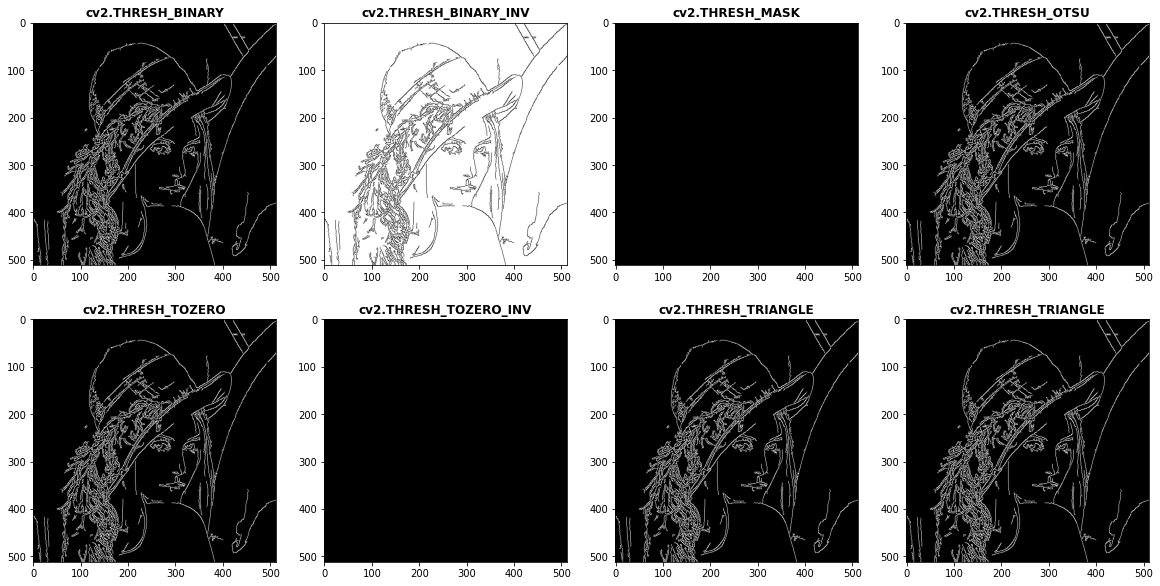

In [ ]:
thresholdTypes = ["cv2.THRESH_BINARY","cv2.THRESH_BINARY_INV","cv2.THRESH_MASK","cv2.THRESH_OTSU","cv2.THRESH_TOZERO","cv2.THRESH_TOZERO_INV","cv2.THRESH_TRIANGLE","cv2.THRESH_TRIANGLE"]
fig,axes = plt.subplots(2,4,figsize=(20,10))
axes = axes.ravel()
for i in range(len(thresholdTypes)):
  _,img = cv2.threshold(lena_canned,127,255,type=eval(thresholdTypes[i]))
  axes[i].imshow(img,cmap='gray')
  axes[i].set_title(thresholdTypes[i],fontsize=12,fontweight='bold')

Todos os tipos de threshold utilizados apresentaram resultados semelhantes. O que mais agradou os olhos foi cv2.THRESH_BINARY_INV. Entretanto, o que agrada os meus olhos nao necessariamente agrada o computador. Acredito que o computador trabalhe melhor com justamente o THRESH_BINARY e tambem o THRESH_TOZERO, porem nao possuo conhecimento/experiencia para afirmar com confianca.

### 2) Detecção de Cantos

As operações de de detecção de canto do tipo Harris e Shi-Tomasi são úteis para a visão computacional e funcionam varrendo uma imagem em busca de mudanças significativas de direção em todas a direções.

a) Faça uma cópia da imagem xadrez.jpg e aplique o algoritmo Harris. Plote o resultado como vimos em sala.

b) Faça uma cópia da imagem xadrez.jpg e aplique o algoritmo Shi-Tomasi. Plote o resultado como vimos em sala.

Text(0.5, 1.0, 'Shi-Tomasi Corner Detection')

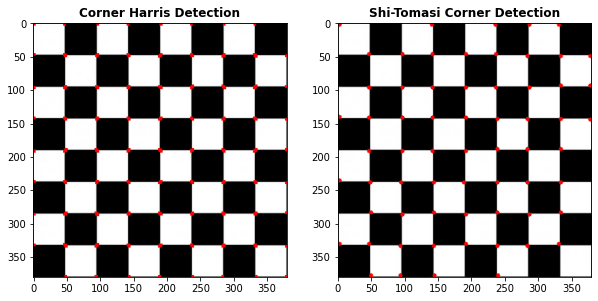

In [ ]:
# Loading image
xadrez_BGR = cv2.imread("xadrez.jpg")
xadrez_gray = cv2.cvtColor(xadrez_BGR,cv2.COLOR_BGR2GRAY)
xadrez_RGB = cv2.cvtColor(xadrez_BGR,cv2.COLOR_BGR2RGB)

# Creating copies
xadrez_CHD = np.copy(xadrez_RGB)
xadrez_SHI = np.copy(xadrez_RGB)

# Transforming array of int into array of float
xadrez_gray = np.float32(xadrez_gray)
#----------------------------------------------

# Corner Harris Detection

CHD = cv2.cornerHarris(xadrez_gray,blockSize=2,ksize=3,k=0.04)
# Dilating to plot corners in a more visible way
CHD = cv2.dilate(CHD,None)
xadrez_CHD[CHD > 0.01*CHD.max()] = [255,0,0]

#----------------------------------------------

# Shi-Tomasi Corner Detection

SHI = cv2.goodFeaturesToTrack(xadrez_gray,64,0.01,10)
for corner in SHI:
  x,y = corner.ravel()
  # Drawing a circle where corner was detected with center x,y
  cv2.circle(xadrez_SHI,(x,y),3,255,-1)

#----------------------------------------------

# Plotting both A) and B)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.imshow(xadrez_CHD)
ax1.set_title("Corner Harris Detection",fontsize=12,fontweight='bold')
ax2.imshow(xadrez_SHI)
ax2.set_title("Shi-Tomasi Corner Detection",fontsize=12,fontweight='bold')


### 3) Detecção de Grid

Além das técnicas de detecção de cantos, temos também a detecção de padrões em Grid, técnica bem eficiente e utilizada principalmente para a calibração de câmeras, rastreamento de objetos, aplicações em realidade aumentada, entre outras.

a) Crie uma cópia da imagem xadrez.jpg e aplique Grid Detection do tipo "Chessboard Corners" e plote o resultado.

b) Crie uma cópia da imagem circlesgrid.jpg e aplique Grid Detection do tipo "Circles Grid" e plote o resultado.


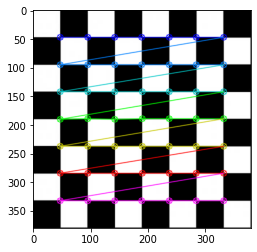

In [ ]:
# Chessboard Corners

xadrez_grid = np.copy(xadrez_RGB)
# Normal chessboard = 8x8. Since the functions find the internal corners, patternSize should be (7,7) 
found, chessCorners = cv2.findChessboardCorners(xadrez_grid,patternSize=(7,7))
cv2.drawChessboardCorners(xadrez_grid,(7,7),chessCorners,found)
plt.imshow(xadrez_grid)

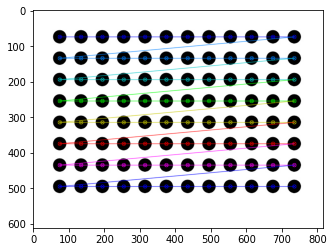

In [ ]:
# Circles Grid

dotgrid = cv2.imread("circlesgrid.jpg")
# Pattern is defined by (12,8) since there are 12 circles on each row and
# 8 circles on each column.
found2,gridCorners = cv2.findCirclesGrid(dotgrid,(12,8),cv2.CALIB_CB_FAST_CHECK)
cv2.drawChessboardCorners(dotgrid,(12,8),gridCorners,found2)
plt.imshow(dotgrid)

### 4) Detecção de Contornos

Nas operações de detecção de contornos podemos detectar as bordas de objetos e localizá-los facilmente em uma imagem, é comumente o primeiro passo em muitas aplicações interessantes, como a segmentação de imagem, detecção e reconhecimento de objetos.

Neste exercício, você poderá usar qualquer imagem, mas recomendamos a imagem óleo.jpg para demonstrar a técnica de detecção de contornos em uma aplicação no mundo real, na identificação de manchas de óleo.

a) Crie uma cópia da imagem e converta para escala de cinza

b) Dependendo da imagem, aplique uma combinação de Canny, blur e thresholding até chegar em uma versão mais simplificada da imagem onde os contornos possam ser facilmente identificados.

c) Ache os contornos

d) Desenhe os contornos em cima da imagem original

##### Letra A

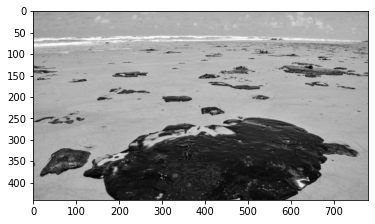

In [ ]:
oil = cv2.imread('oleo.jpg',0)
plt.imshow(oil,cmap='gray')

##### Letra B

121 226


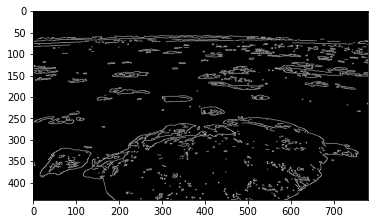

In [ ]:
# Applying Canny

median_val = np.median(oil)
lower = int(max(0,0.7*median_val))
upper = int(min(255,1.3*median_val))
print(lower,upper)
oil_canned = cv2.Canny(oil,threshold1=lower+30,threshold2=upper)
plt.imshow(oil_canned,cmap='gray')

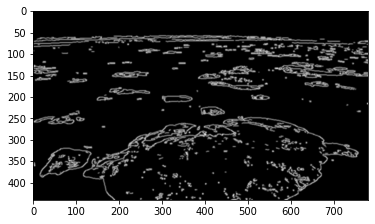

In [ ]:
# Applying Blur

oil_blur = cv2.GaussianBlur(oil_canned,ksize=(5,5),sigmaX=0)
plt.imshow(oil_blur,cmap='gray')

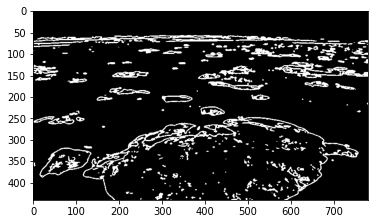

In [ ]:
# Applying Threshold

_,oil_thresh = cv2.threshold(oil_blur,60,255,cv2.THRESH_BINARY)
plt.imshow(oil_thresh,cmap='gray')

##### Letra C

Text(0.5, 1.0, 'Internal contours')

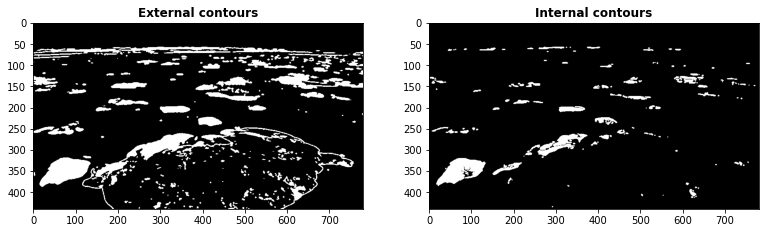

In [ ]:
contours , hierarchy = cv2.findContours(oil_thresh,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

ext_contours = np.zeros(oil_thresh.shape)
int_contours = np.zeros(oil_thresh.shape)

for i in range(len(contours)):
  if hierarchy[0][i][3] == -1:
    cv2.drawContours(ext_contours,contours,i,255,-1)
  else:
    cv2.drawContours(int_contours,contours,i,255,-1)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(13,13))
ax1.imshow(ext_contours,cmap='gray')
ax1.set_title("External contours",fontsize=12,fontweight='bold')
ax2.imshow(int_contours,cmap='gray')
ax2.set_title("Internal contours",fontsize=12,fontweight='bold')

##### Letra D

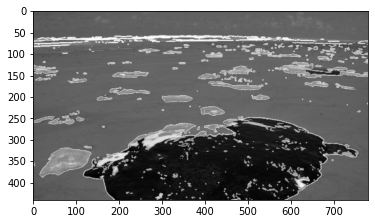

In [ ]:
oil = np.float32(oil)
ext_contours = np.float32(ext_contours)
int_contours = np.float32(int_contours)

# External contour

ext_oil = cv2.addWeighted(oil,1,ext_contours,0.8,0)
plt.imshow(ext_oil,cmap='gray')

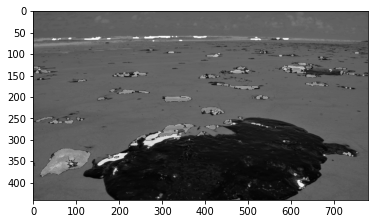

In [ ]:
# Internal contour

int_oil = cv2.addWeighted(oil,1,int_contours,0.8,0)
plt.imshow(int_oil,cmap='gray')

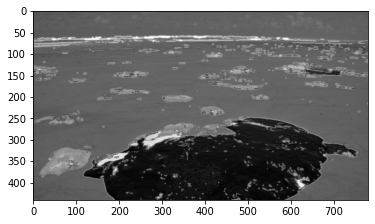

In [ ]:
# Mixing the 2 for FUN

allTheOil = cv2.addWeighted(ext_oil,0.5,int_oil,0.5,0)
plt.imshow(allTheOil,cmap='gray')